# Adult Census Income Prediction
 
 The goal here is to predict wether a person has an income of more than 50k or not.
 This is basically a binary classification problem where a person's salary is classified into the two groups
>50K group or <=50K group. 
  
Source :

https://www.kaggle.com/uciml/adult-census-income

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to predict whether income exceeds $50k per year based on the provided. census data provided above. The Datasets consists of a list of records , each of which explains various features of a person along with his income per year.

A brief description of the features are as follows: Attributes: income (Target Variable): >50K, <=50K
Predictors :-

age: continuous
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
fnlwgt: continuous
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
education-num: continuous
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
sex: Female, Male
capital-gain: continuous
capital-loss: continuous
hours-per-week: continuous
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [332]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
from numpy import nan
import missingno as msno
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


##Exploratory Data Analysis

In [333]:
df = pd.read_csv("/Users/sujithasunkara/Documents/Kaggle/Income prediction/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [335]:
# Checking unique values for all variables
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [336]:
df['fnlwgt'].unique()
df['education'].unique()
df['education-num'].unique()
df['marital-status'].unique()
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [337]:
df['relationship'].unique()
df['race'].unique()
df['sex'].unique()
df['country'].unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [338]:
df =df.replace(' ?',nan)

In [339]:
# Checking for null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [340]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [341]:
df.shape

(32561, 15)

<AxesSubplot:>

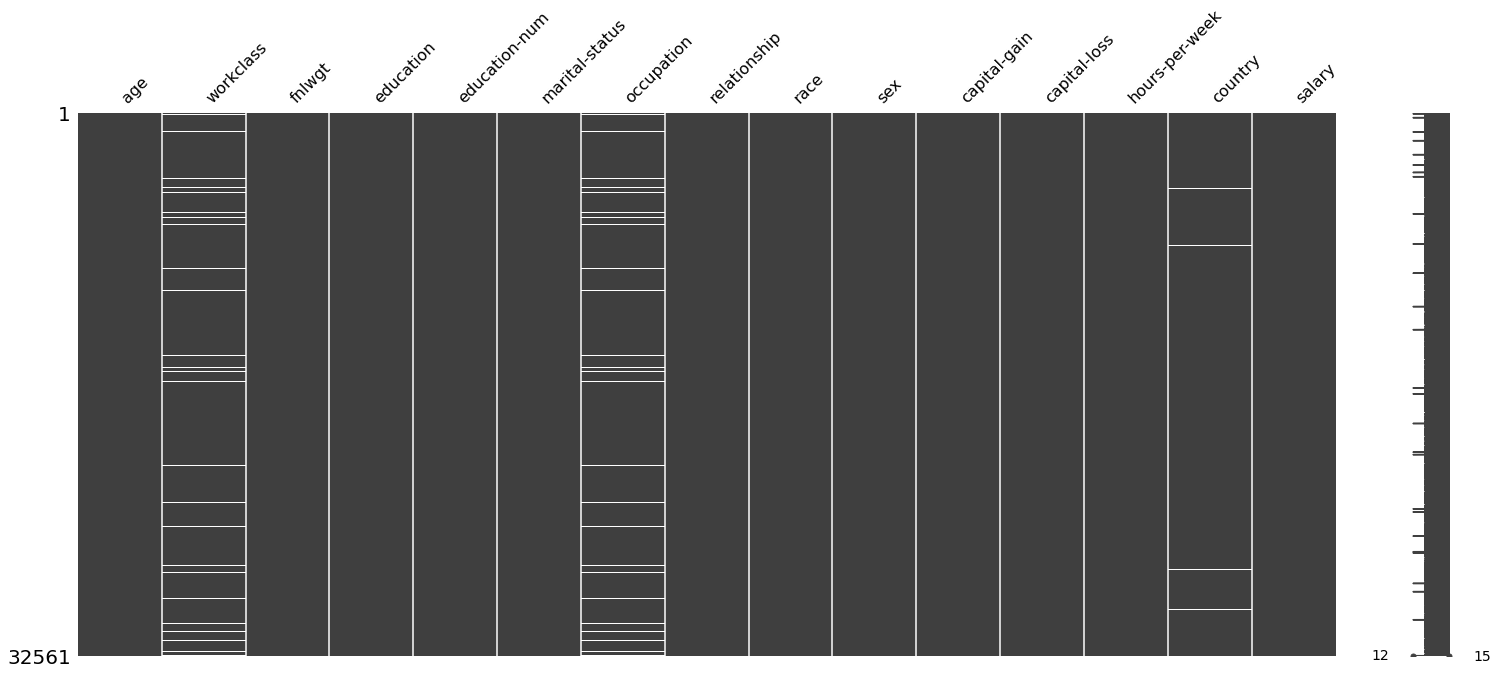

In [342]:
msno.matrix(df)

#### Observations: 
we can notice from graph as workplace, occupation and country has missing values.
since missing variables are category, We replace missing values with most frequent category values.

In [343]:
## Imputing variables
imputer = CategoricalImputer(variables = ['workclass','occupation','country'])

In [344]:
df = imputer.fit_transform(df)

In [345]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [346]:
# The education column has a corresponding education-num column which has numerical values
df.drop(columns=['education'] ,inplace=True)


### Univariate Analysis

In [347]:

#Target Variable 
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [348]:
counter = Counter(df['salary'])
for k,v in counter.items():
    per = v / len(df['salary']) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class= <=50K, Count=24720, Percentage=75.919%
Class= >50K, Count=7841, Percentage=24.081%


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

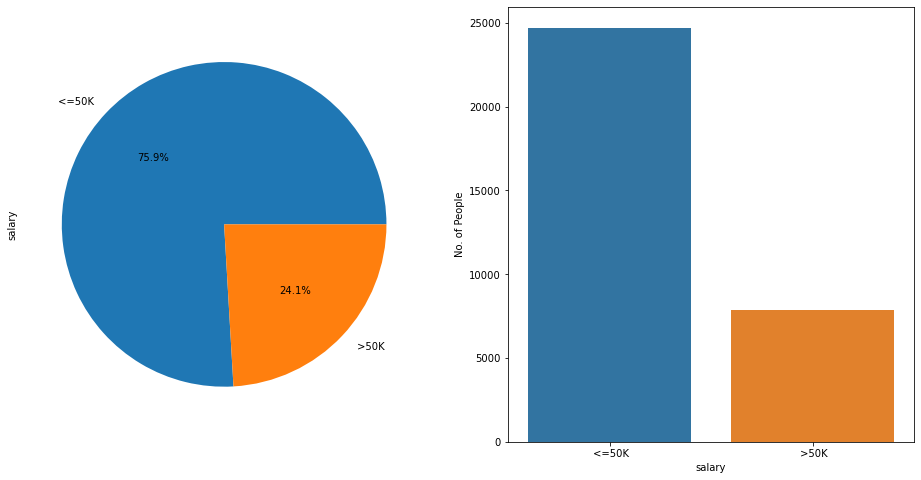

In [349]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df['salary'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='salary',data=df)
plt.ylabel('No. of People')
df['salary'].value_counts()


In [350]:
df_category = df.select_dtypes(include =['object']).copy()

In [351]:

def univariate(df,col):
    plt.figure (figsize = (16,8))
    
    if df[col].dtype !='int64' or df[col]!='float64':
        plt.subplot(1,2,1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.subplot(1,2,2)
        sns.countplot(x= col,data=df)
        plt.xlabel(col)
        plt.ylabel('No. of People')
        plt.xticks(rotation =90)
       
    plt.show()

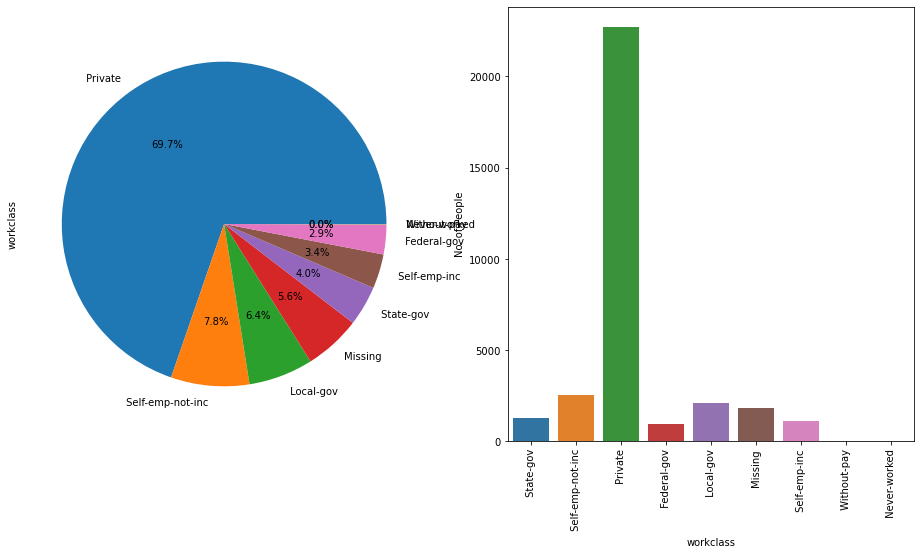

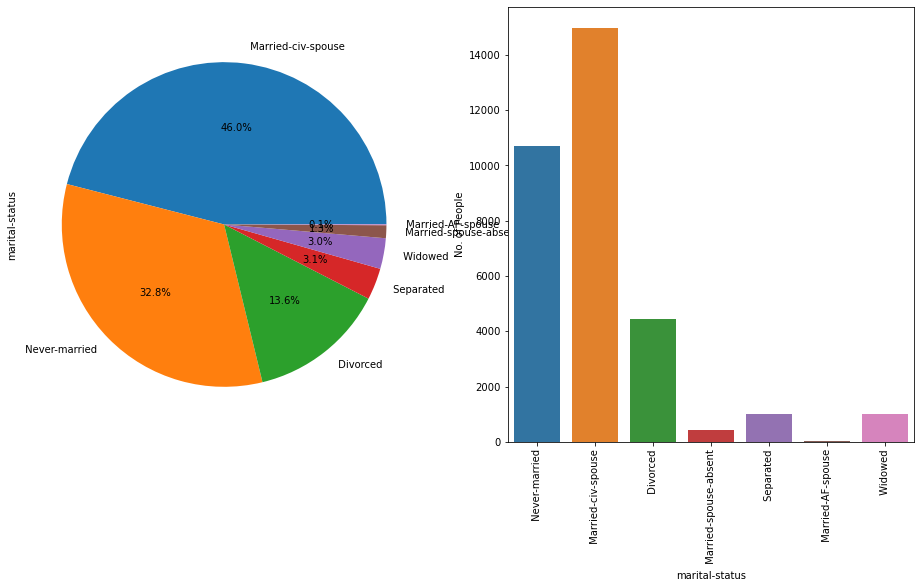

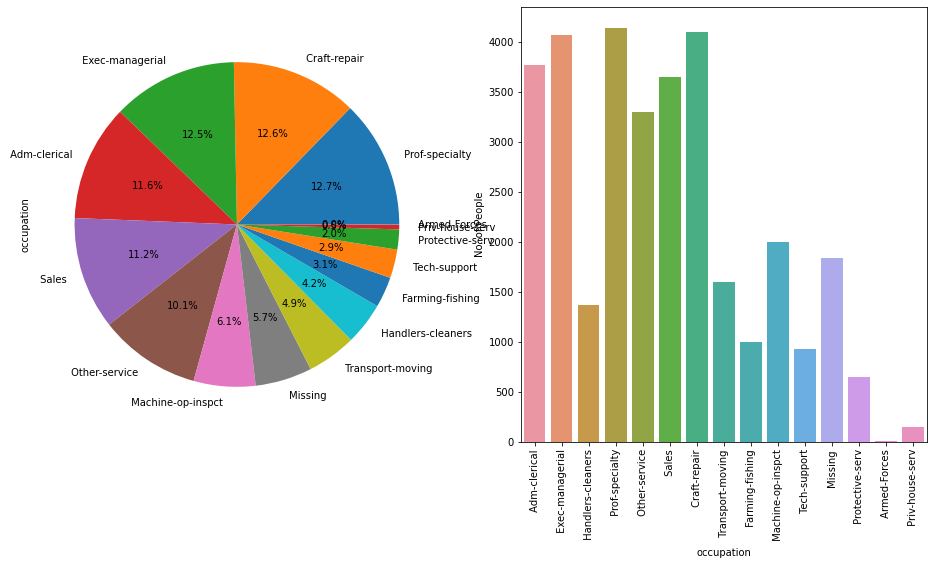

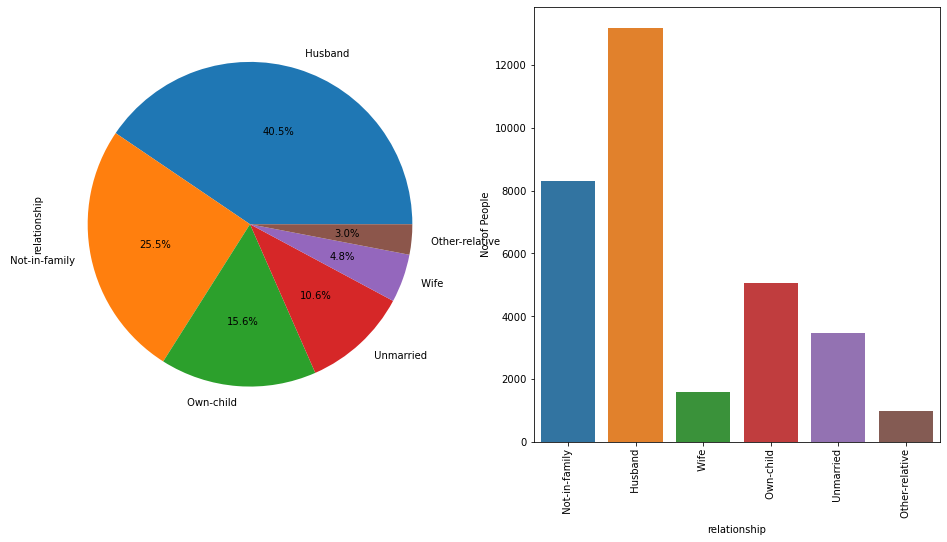

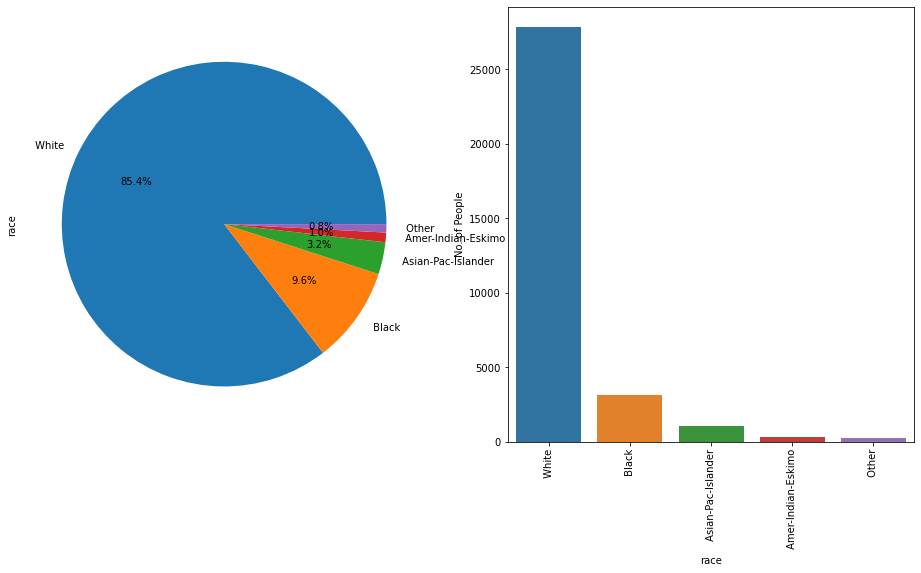

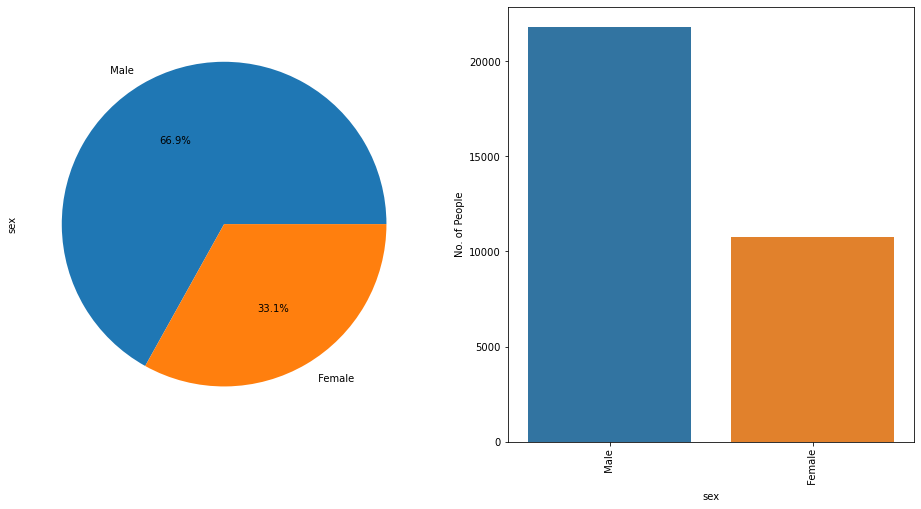

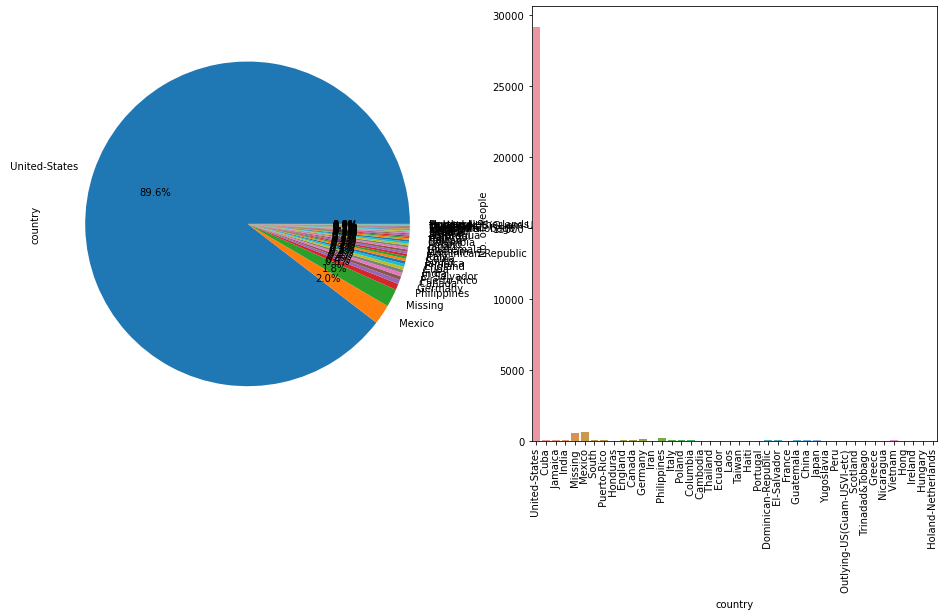

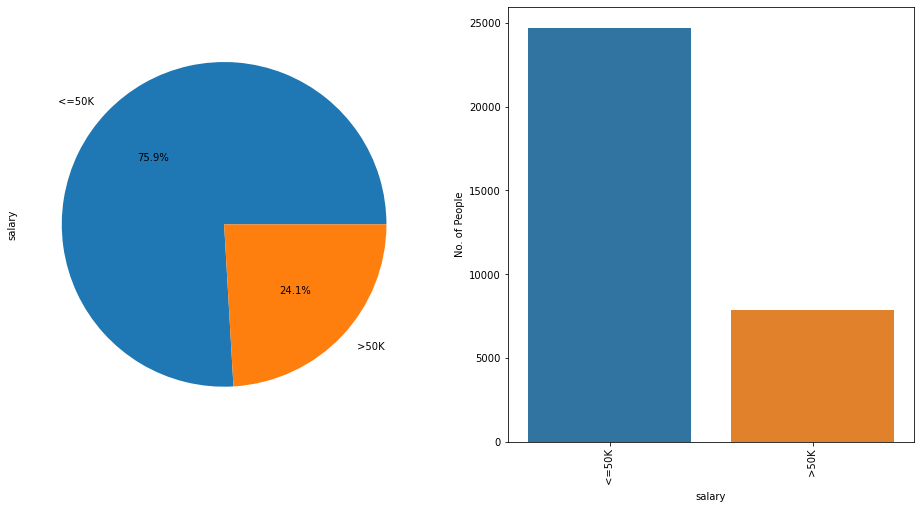

In [352]:
for features in df_category:
    univariate(df,features)

In [353]:

df_numerical = df.select_dtypes(include=['int64']).copy()
df_numerical.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [354]:
def plots(df,col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        
        sns.distplot(df[col])
        plt.subplot(1,2,2)
        sns.boxplot(x='salary', y = col, data =df )
    plt.show()

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


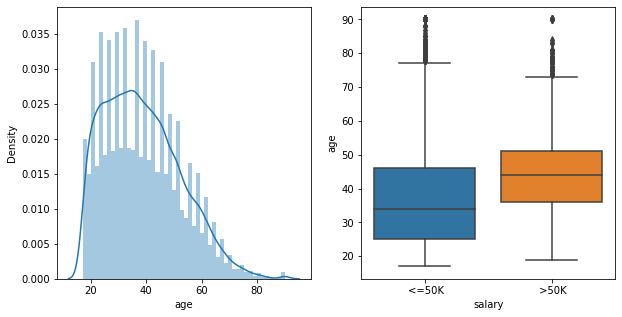

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


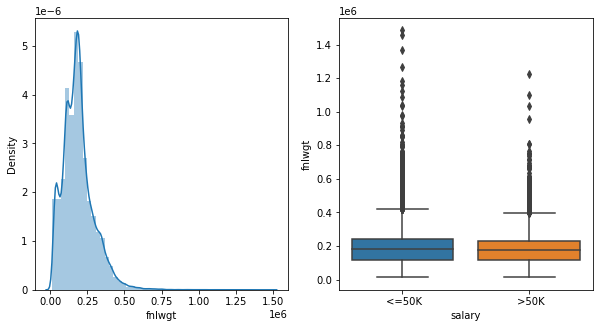

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


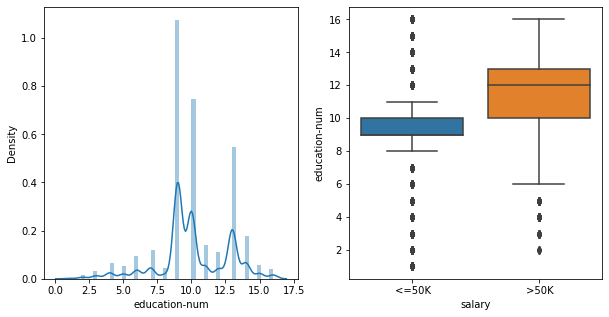

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


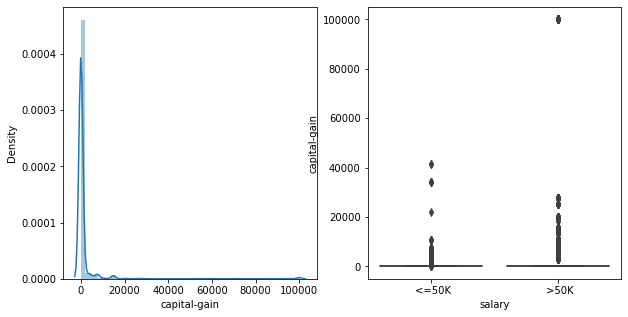

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


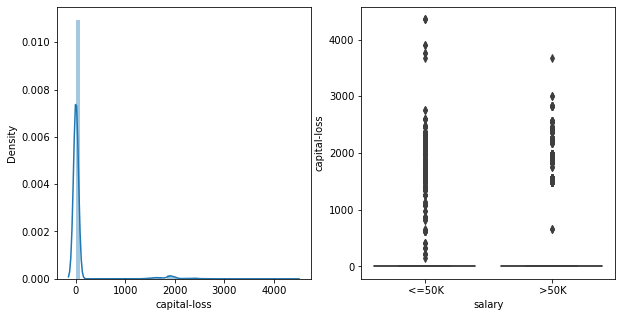

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


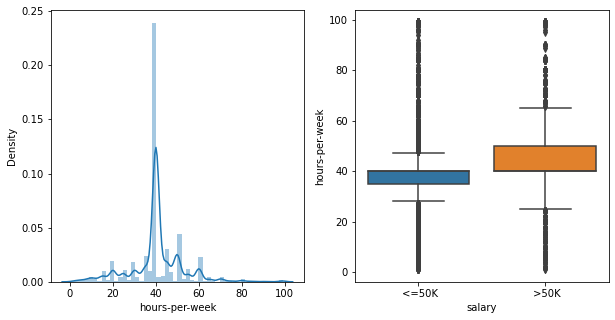

In [355]:
for features in df_numerical:
    plots(df,features)

### Multivariate analysis

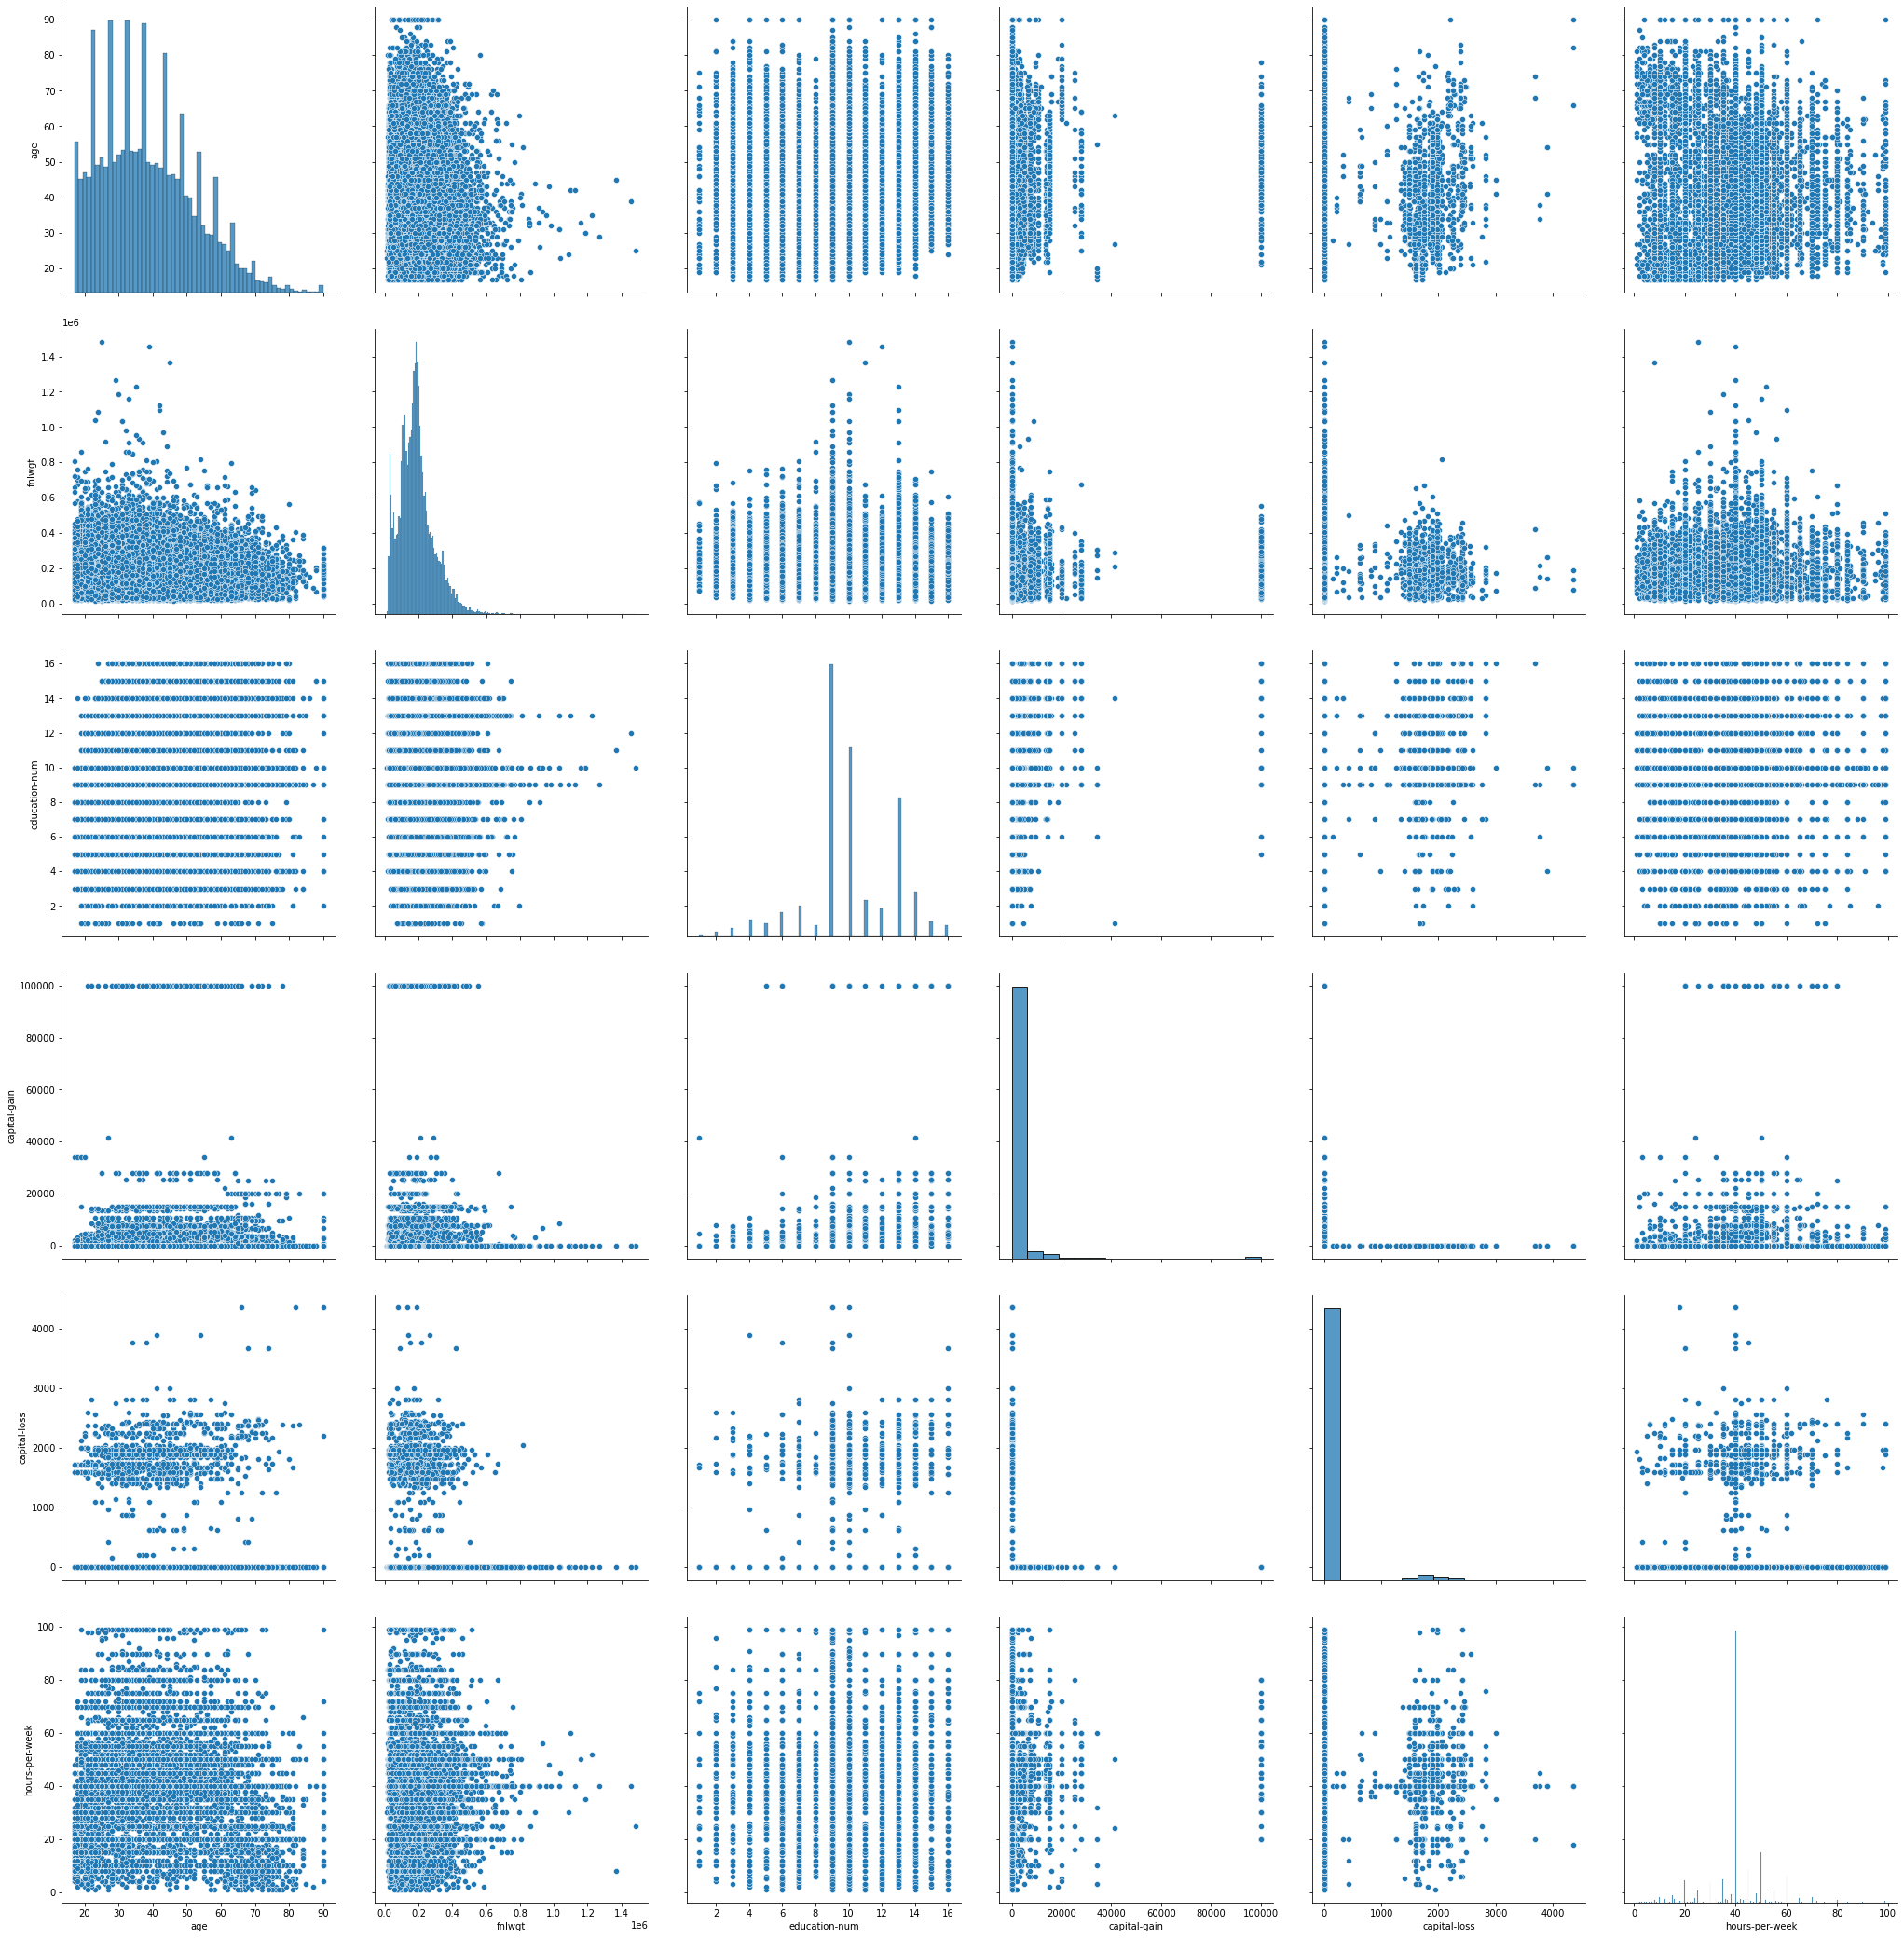

In [356]:

pplot = sns.pairplot(df)
pplot.fig.set_size_inches(30,30)

### Bivariate Analysis

In [357]:
##barplot
def plot_fetures(df, col):
    plt.figure (figsize = (16,8))
    

    if df[col].dtype !='int64' or df[col]=='salary':
        
        sns.countplot(x=col, hue= 'salary', data = df)
        
        plt.xticks(rotation = 70)
    
    plt.show()

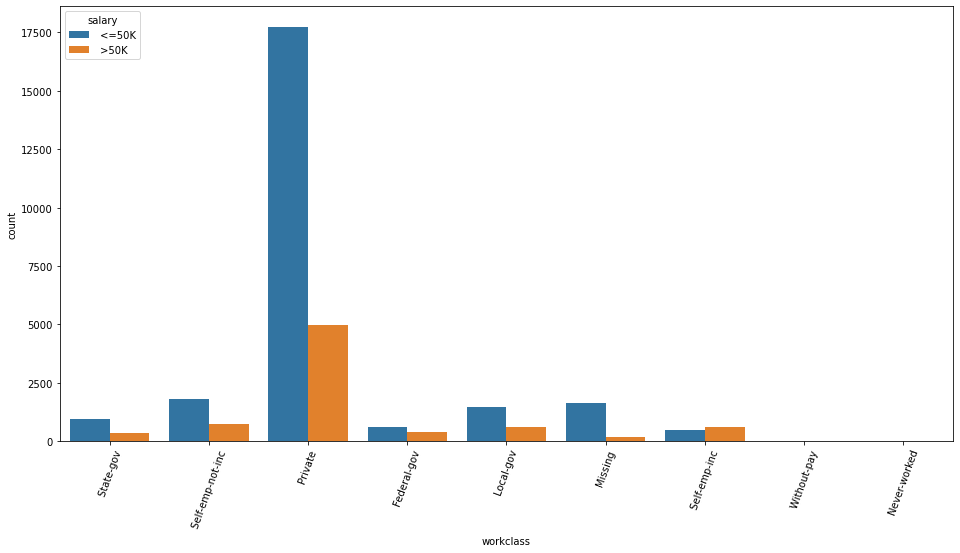

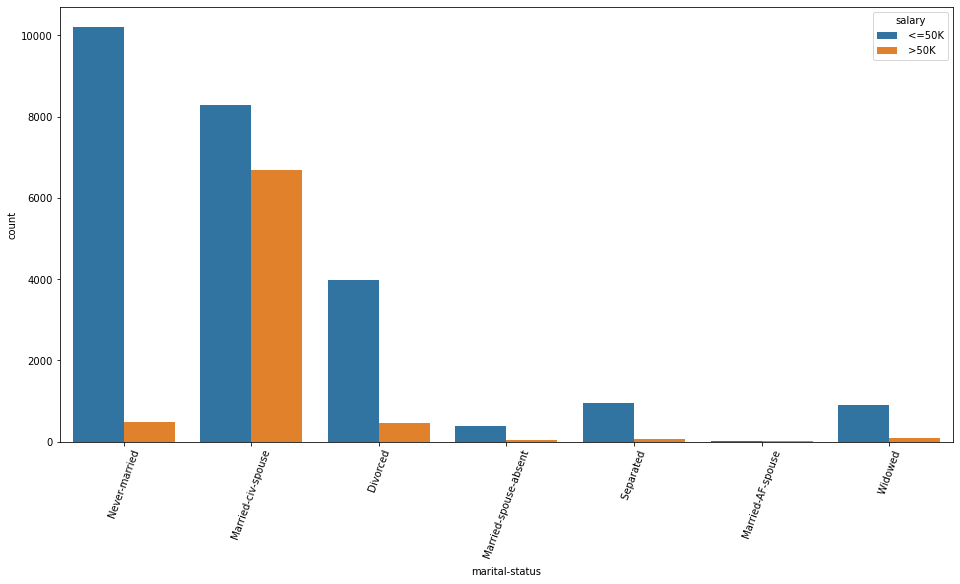

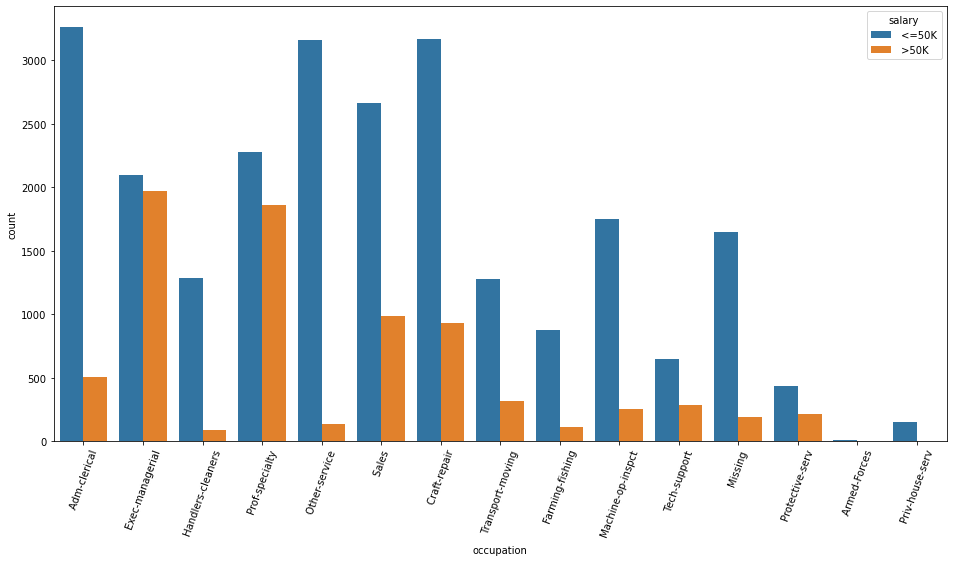

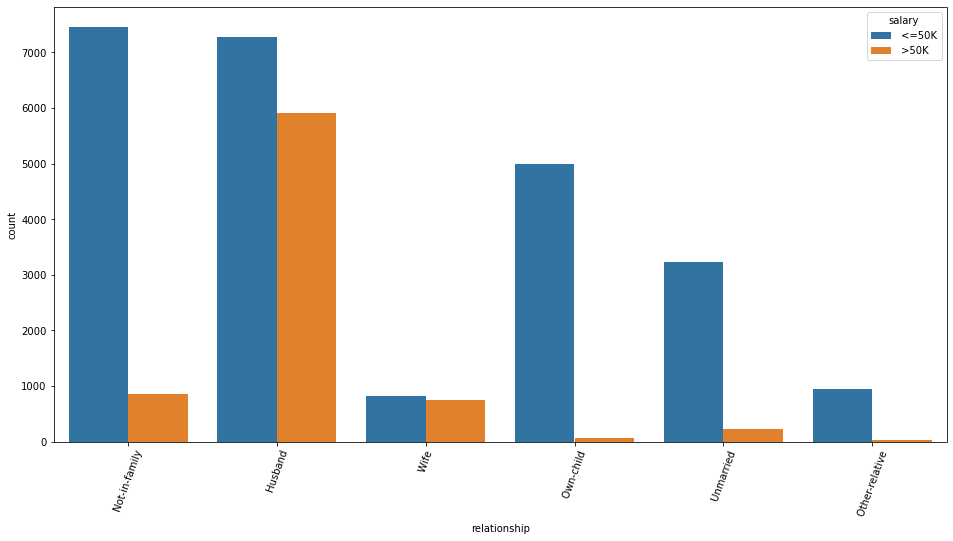

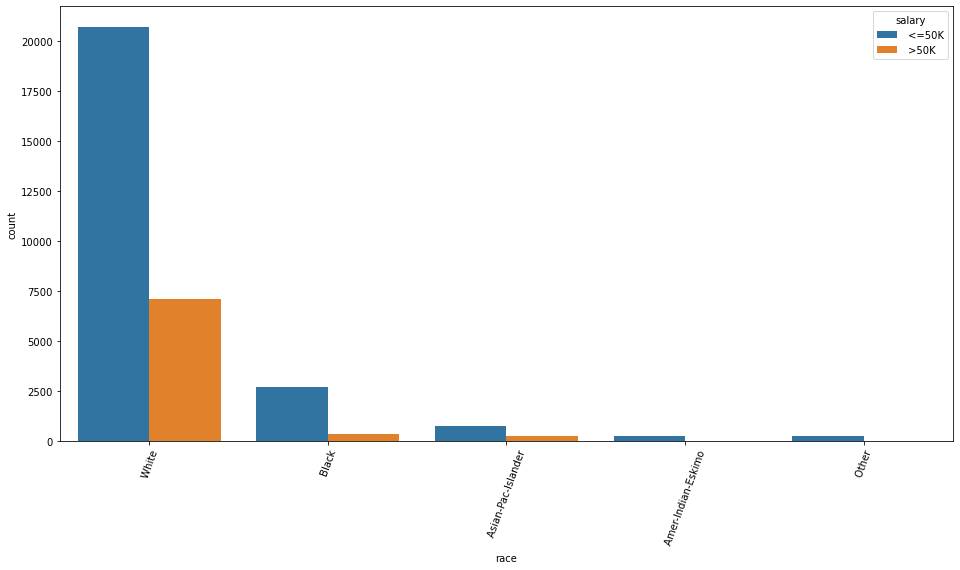

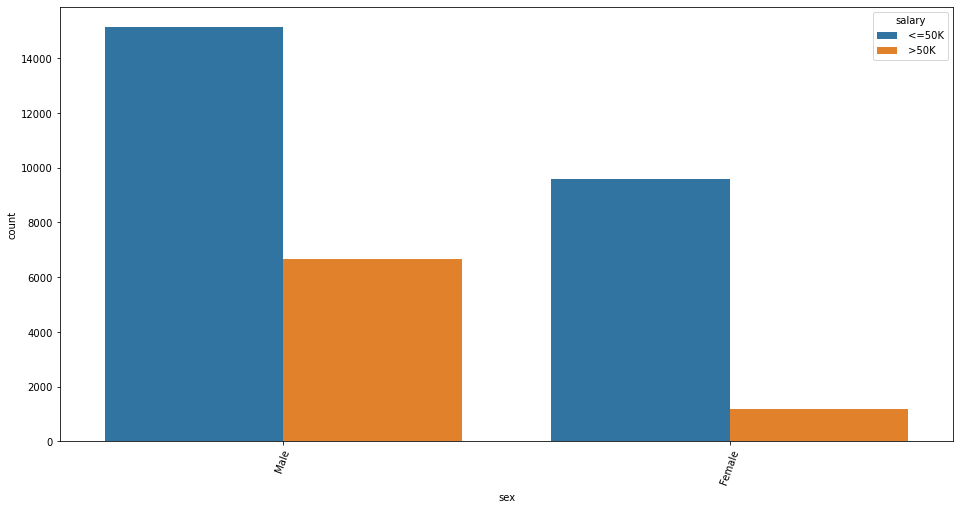

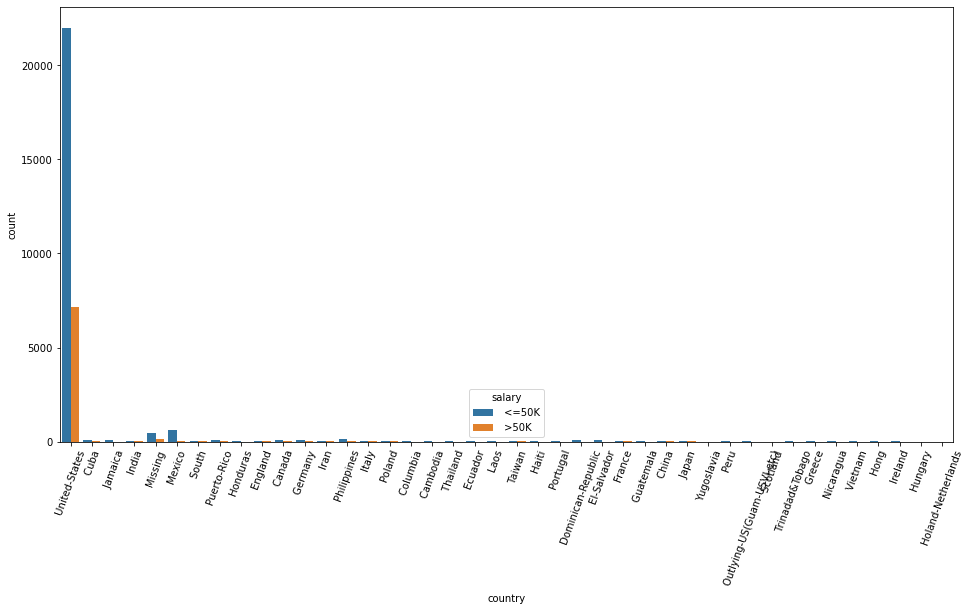

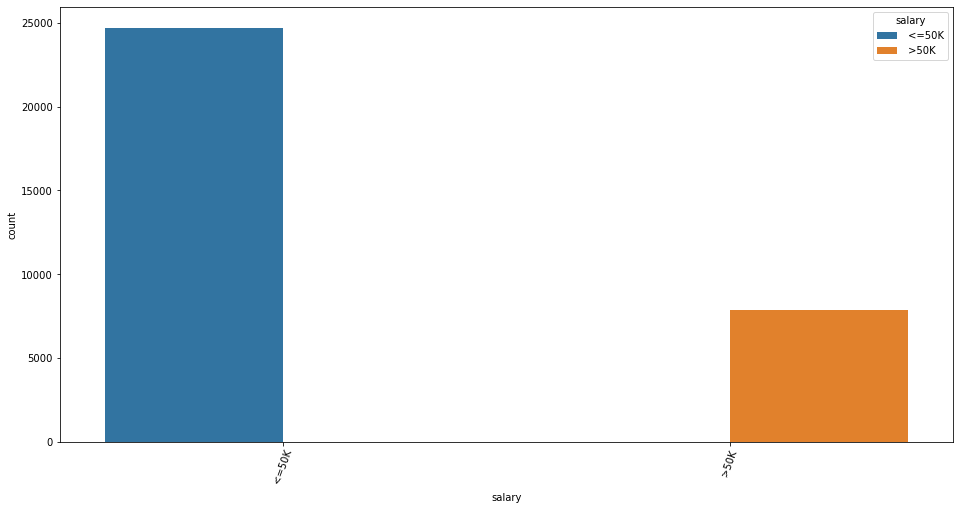

In [358]:
for features in df_category:
    plot_fetures(df,features)

## Correlation between variables

In [359]:
df['salary']= df['salary'].map({' <=50K': 0,' >50K':1}).astype(int)

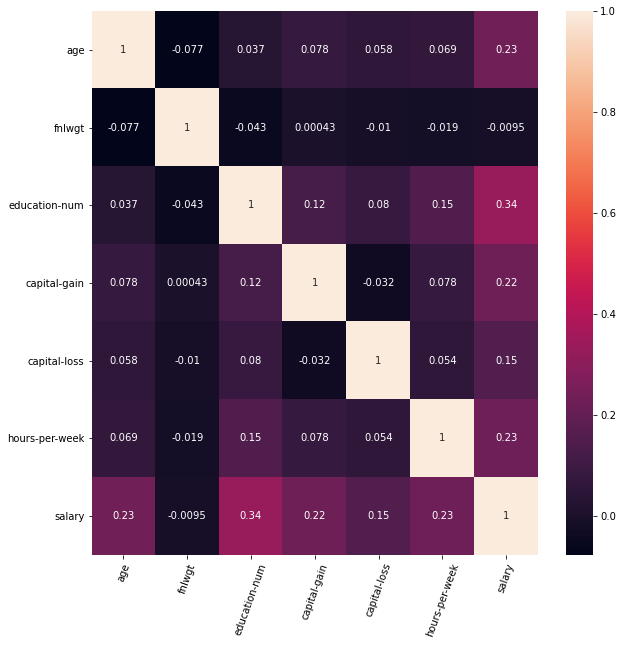

In [360]:

corr_matrix = df.corr()
plt.figure(figsize =(10,10))
sns.heatmap(corr_matrix, annot = True)
plt.xticks(rotation =70)
plt.yticks(rotation =0)
plt.show()

#### Observations:
 1. The dataset has unbalanced data, where the target variable has 75.9% with salary less than 50k and 24.1% has salary greater than 50k, the sex bariable has more males than females and race has more percentage with white's.
2. Other than fnlwgt all other variables have positive correltion with salary.
   Education_num, Age, Capital-gain and hours-per-week were highly corelated with salary.

## Data Preprocessing

### Encoding

In [361]:
df_category['salary']= df_category['salary'].map({' <=50K': 0,' >50K':1}).astype(int)

In [362]:
from sklearn.preprocessing import LabelEncoder


In [363]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [364]:
# Using the dummy encoding to encode the categorical columns to numericsl ones
for col in df_category.drop('salary',axis=1).columns:
    x=df_category[col].head(1)
    df_category= pd.get_dummies(df_category, columns=[col], prefix = [col], drop_first=True)
    

## Feature Scaling

In [365]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_numerical)

In [366]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=df_numerical.columns)
scaled_num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


## Feature importance

In [367]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [368]:
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(x,y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: could not convert string to float: ' United-States'

In [ ]:
x.info()

In [ ]:
x = x.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'country',
            'occupation', 'race'], axis=1)

## Feature Selection

In [ ]:
## Train_test split
x = df.drop(columns=['salary'])
y = df.salary


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_test.shape

In [ ]:
plt.hist(y)

Target data is imbalanced,so we need to balance the data by using randomsampling

In [ ]:
rs = RandomOverSampler()
x_sampled,y_sampled  = rs.fit_sample(x,y)

In [ ]:
plt.hist(y_sampled)

Data is balanced now

## Data Modelling

### Logistic Regression

In [ ]:
log_re = LogisticRegression()
# Train model with training data
log_re.fit(x_train,y_train)

In [ ]:
## prediction on our test data
y_pred_log_re = log_re.predict(x_test)

### Random Forest classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
# Train model with training data
rf.fit(x_train,y_train)

In [ ]:
## prediction on our test data
y_pred_rf = rf.predict(x_test)


### Decision Tree Classifier

In [369]:
tree = DecisionTreeClassifier(max_depth=11)
tree = tree.fit(x_train, y_train)
# PREDICTIONS
tree_predictions = tree.predict(x_test)

### Support Vector classifiers

In [370]:
svm = svm.SVC(kernel='linear')
svm = svm.fit(x_train, y_train)

In [371]:
svm_predictions = svm.predict(x_test)

### KNN classifier

In [372]:
knn = KNeighborsClassifier(n_neighbors=40)
knn = knn.fit(x_train, y_train)

In [373]:
knn_predictions = knn.predict(x_test)

### Naive Bayes Classifier

In [374]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [375]:
nb.fit(x_train, y_train)

GaussianNB()

In [376]:
y_pred_nb = nb.predict(x_test)

## Model Evaluation

In [377]:
from sklearn.metrics import f1_score

In [378]:
## Logistic Regression:
##Accuracy
log_acc = metrics.accuracy_score(y_test, y_pred_log_re)
log_F1 = f1_score(y_test,y_pred_log_re)
print("Accuracy_logistic:",log_acc,"\n")

print('Logistic F1 score :',log_F1)

Accuracy_logistic: 0.8582834331337326 

Logistic F1 score : 0.6771598461000349


In [379]:
## Random Forest Classifier
RF_acc = metrics.accuracy_score(y_test, y_pred_rf)
RF_F1 = f1_score(y_test,y_pred_rf)
print(" RF Accuracy: ",RF_acc,"\n")

print(' RF F1 score:', RF_F1)

 RF Accuracy:  0.8622754491017964 

 RF F1 score: 0.6897267381528882


In [380]:
## Decision Tree classifier
DT_acc = metrics.accuracy_score(y_test, tree_predictions)
DT_F1 = f1_score(y_test,tree_predictions)
print("Decision TRee Accuracy: ",DT_acc,"\n")

print('Decision TRee F1 score :',DT_F1 )

Decision TRee Accuracy:  0.8562874251497006 

Decision TRee F1 score : 0.6664290805416965


In [381]:
## Support Vector Classifier
SVM_acc = metrics.accuracy_score(y_test, svm_predictions)
Svm_F1 = f1_score(y_test,svm_predictions)
print("SVM Accuracy: ",SVM_acc,"\n")

print('SVM F1 score:',Svm_F1 )

SVM Accuracy:  0.8539843390142792 

SVM F1 score: 0.665964172813488


In [382]:
## KNN calssifier
KNN_acc = metrics.accuracy_score(y_test, knn_predictions)
KNN_F1 =  f1_score(y_test, knn_predictions)
print("KNN Accuracy: ",KNN_acc,"\n")

print('KNN F1 score :',KNN_F1)

KNN Accuracy:  0.8552126516198373 

KNN F1 score : 0.6687741482262031


In [383]:
## Naive Bayes Classifier
NB_acc = metrics.accuracy_score(y_test, y_pred_nb )
NB_F1 = f1_score(y_test,y_pred_nb )
print("NB Accuracy: ",NB_acc,"\n")

print('NB F1 score :',NB_F1 )

NB Accuracy:  0.49669890987256254 

NB F1 score : 0.4806717363751585


In [388]:
accuracy = [log_acc,RF_acc,DT_acc,SVM_acc, KNN_acc, NB_acc ]
F1_scores = [log_F1,RF_F1,DT_F1,Svm_F1, KNN_F1, NB_F1]
names = ['Logistic', 'RandomForest','DecisionTree','SVM','KNN','NaiveBayes']

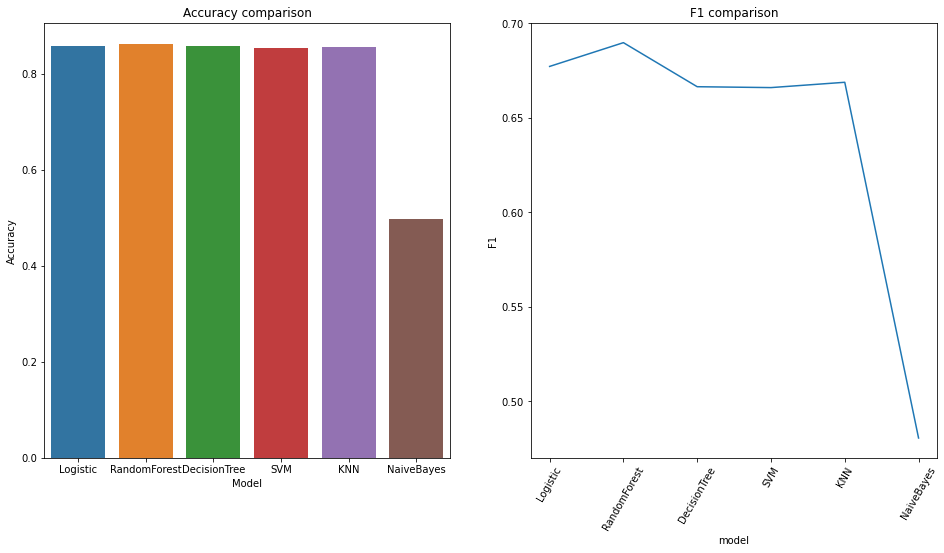

In [393]:
plt.figure (figsize = (16,8))
plt.subplot(1,2,1)
sns.barplot(x=names, y = accuracy)
plt.title("Accuracy comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
sns.lineplot(x= names,y = F1_scores)
plt.title("F1 comparison")
plt.xlabel("model")
plt.ylabel('F1')
plt.xticks(rotation =60)
plt.show()

Random Forest model has the highest accuracy and F1score.

Text(0.5, 1.0, 'Random forest Confusion Matrix')

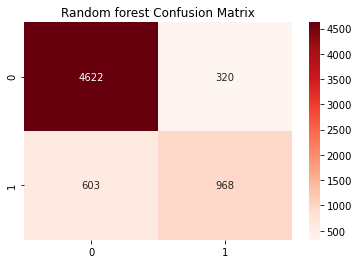

In [394]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
cf=confusion_matrix(y_test, y_pred_rf)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Reds', annot=True, fmt='d')
plt.title("Random forest Confusion Matrix")

In [395]:
print('Accuracy on test:', accuracy_score(y_test,y_pred_rf),"\n")
print('F1 score on test:', f1_score(y_test,y_pred_rf),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")

Accuracy on test: 0.8622754491017964 

F1 score on test: 0.6897267381528882 

Precision : 0.7553030303030303 

Specificity : 0.9346418454067179 

Recall : 0.6346276257161044 



## Model Selection:
From the above models , Random forest performed best with highest accuracy score and F1 score.